# Preprocessing the data set

## Import the prerequest

In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
import os


## Format and visualize the data

In [361]:
if __name__ == "__main__":
    wine = load_wine()
    dfColumns = list(wine["feature_names"])
    dfColumns.append("actual_level")

    dfData = pd.DataFrame(data=np.c_[wine["data"], wine["target"]], columns=dfColumns)

    if not os.path.isfile("wine_data.csv"):
        dfData.to_csv("wine_data.csv", index=False)

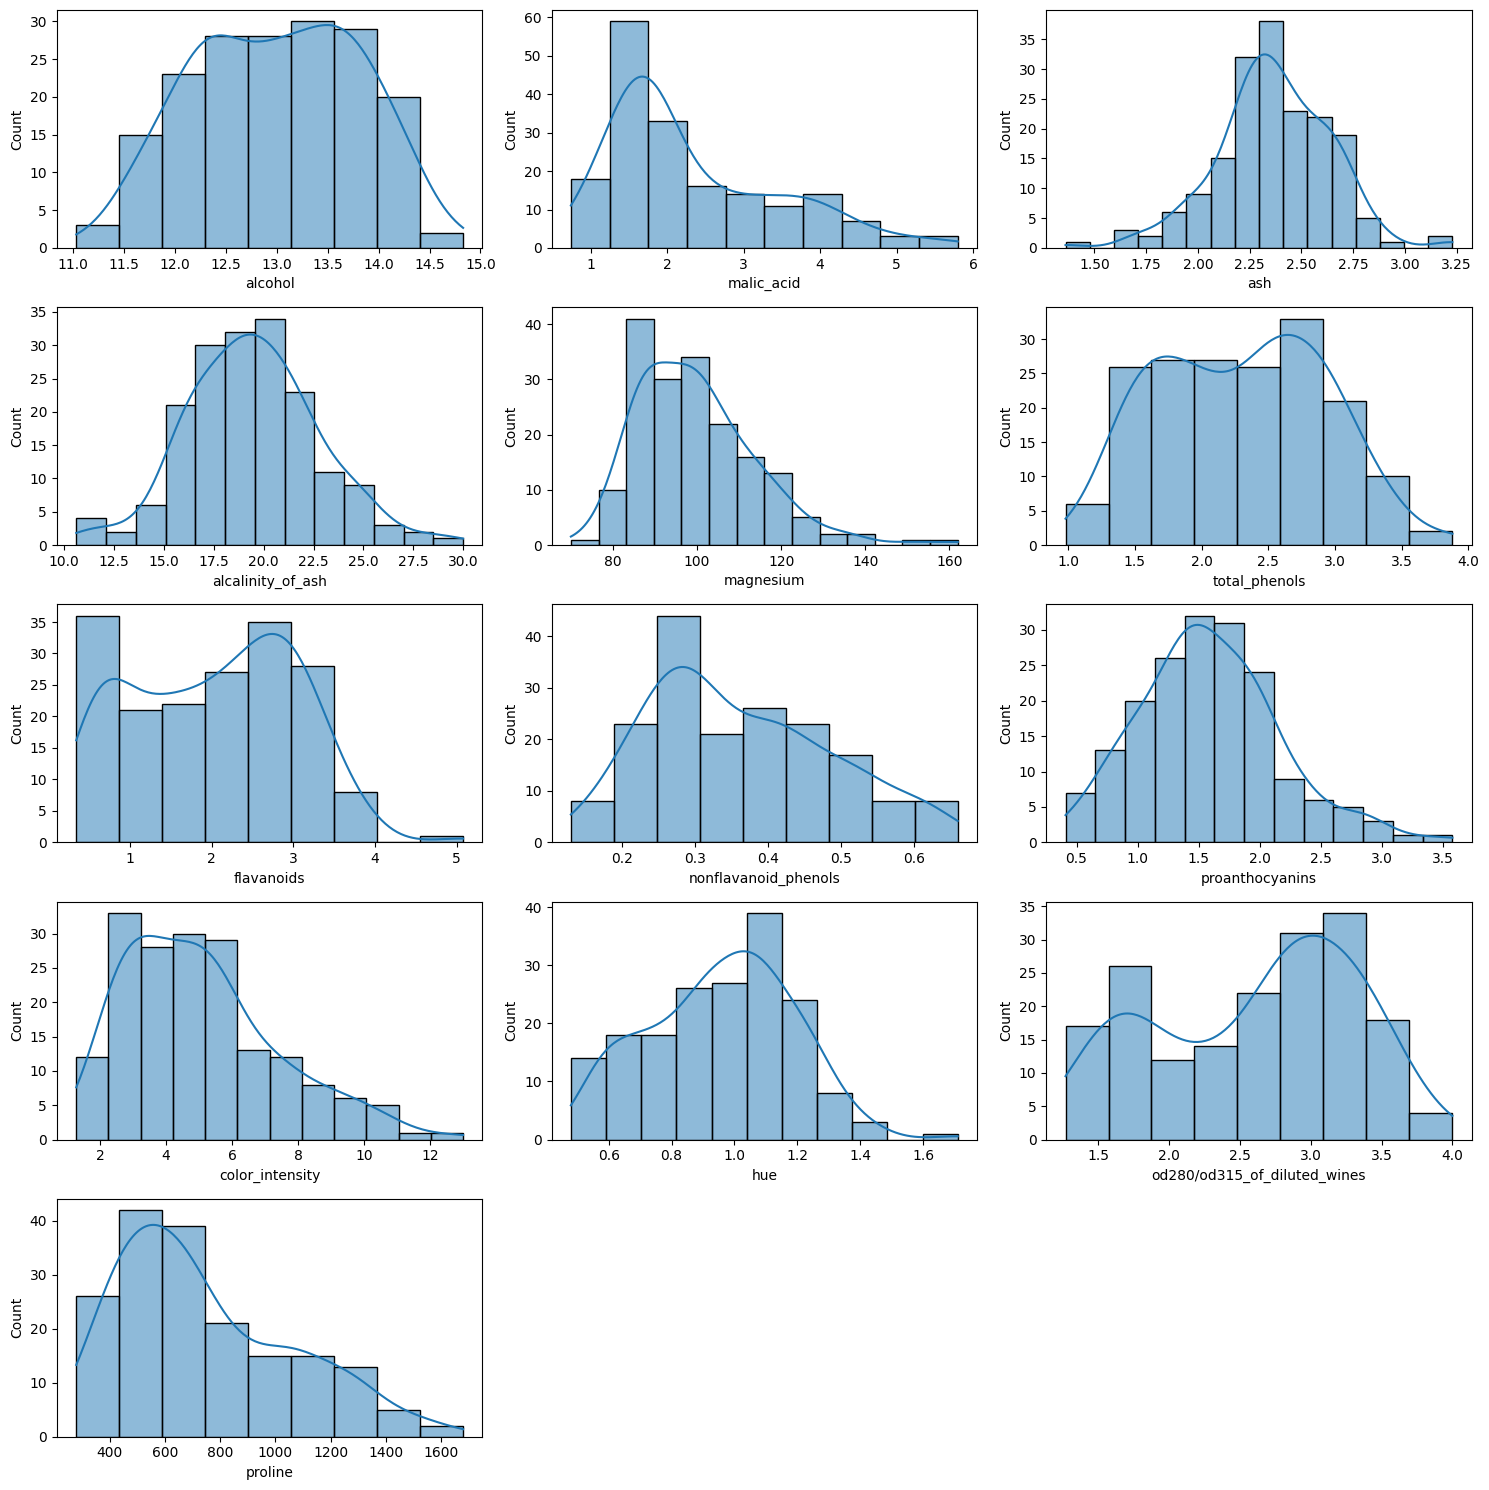

In [362]:
# fig, axes = plt.subplots(nrows=5, ncols=3)
fig, axes = plt.subplots(nrows=5, ncols=3)
fig.set_size_inches(15, 15)  # You might want to adjust this to fit your screen or needs

# Iterate over the columns and axes to create the plots
withoutActualLevelColumns = dfColumns[:-1]
for i, column in enumerate(withoutActualLevelColumns):
    sns.histplot(dfData[column], ax=axes[i // 3, i % 3], kde=True)

# If the number of plots is not a multiple of the number of columns,
# the empty subplots might need to be hidden
for i in range(len(withoutActualLevelColumns), 5 * 3):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plot

<Axes: title={'center': 'Heat Map'}>

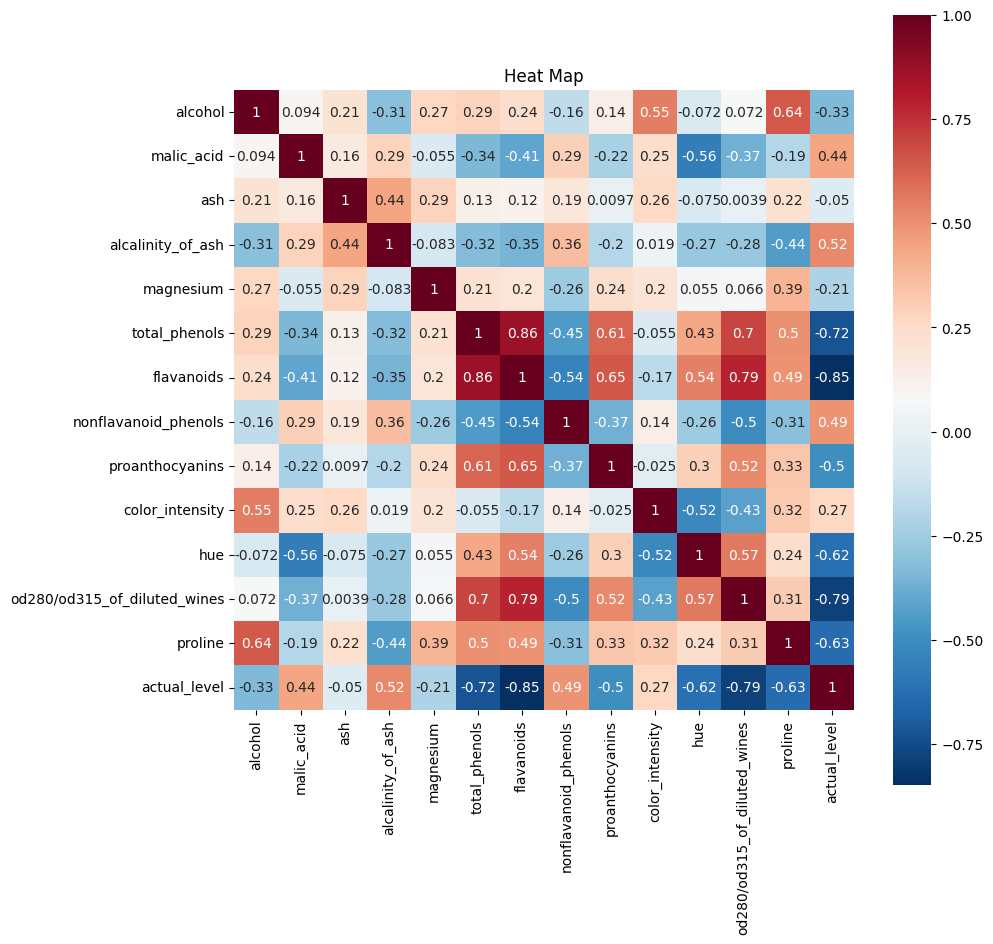

In [363]:
corr = dfData.corr()
plt.figure(figsize=(10,10))
plt.title("Heat Map")
sns.heatmap(corr,square=True,annot=True,cmap='RdBu_r')

## Check the count of the none value

In [364]:
X = dfData.drop(columns="actual_level", axis=1).values
Y = dfData["actual_level"]

print("checked missing data(NAN mount):", len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


## Split the data set as percentage

In [365]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=40)

print('train shape:', X_train.shape[0],"rows, ",X_train.shape[1],"columns")
print('test shape:', X_test.shape[0],"rows, ",X_test.shape[1],"columns")

train shape: 115 rows,  13 columns
test shape: 63 rows,  13 columns


# Decision Tree Algorithm

[Text(0.4444444444444444, 0.875, 'x[9] <= 3.77\ngini = 0.655\nsamples = 115\nvalue = [40, 46, 29]'),
 Text(0.2222222222222222, 0.625, 'x[2] <= 2.945\ngini = 0.05\nsamples = 39\nvalue = [1, 38, 0]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.6666666666666666, 0.625, 'x[6] <= 1.4\ngini = 0.58\nsamples = 76\nvalue = [39, 8, 29]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]'),
 Text(0.7777777777777778, 0.375, 'x[12] <= 670.0\ngini = 0.282\nsamples = 47\nvalue = [39, 8, 0]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]')]

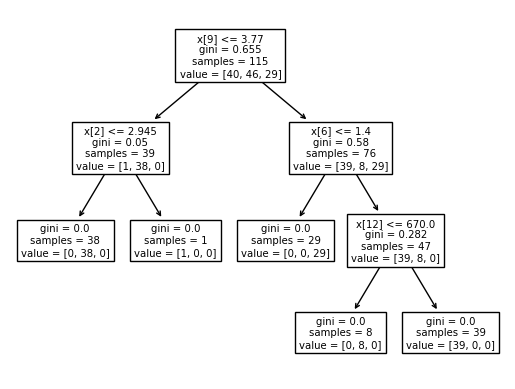

In [366]:
from sklearn import tree

dtclfr = tree.DecisionTreeClassifier()
wine_dtclfr = dtclfr.fit(X_train, Y_train)
tree.plot_tree(wine_dtclfr)

## Evaluate

In [367]:
from sklearn import metrics

test_y_predicted = wine_dtclfr.predict(X_test)
accurancy = metrics.accuracy_score(Y_test, test_y_predicted)
print(accurancy)

0.9206349206349206


# Random Forest Algorithm

In [368]:
from sklearn.ensemble import RandomForestClassifier

rdmclfr = RandomForestClassifier(n_estimators=150)
rdmclfr.fit(X_train, Y_train)
test_y_predicted = rdmclfr.predict(X_test)
accurancy = metrics.accuracy_score(Y_test, test_y_predicted)
print(accurancy)

1.0


# SVM Algorithm

In [369]:
from sklearn.svm import SVC

svmclfr = SVC(kernel="linear", random_state=0)
svmclfr.fit(X_train, Y_train)
test_y_predicted = svmclfr.predict(X_test)
accurancy = metrics.accuracy_score(Y_test, test_y_predicted)
print(accurancy)

0.9682539682539683


# Saving Model

## Saving the random forest model

In [370]:
import joblib

filename = "Wine_RandomForest_Model.pkl"
joblib.dump(rdmclfr, filename)

loaded_model = joblib.load(filename)

source = [14.13, 4.1, 2.74, 24.5, 96, 2.05, 0.76, 0.56, 1.35, 9.2, 0.61, 1.6, 560]
print("Source: ", source)

predict_result = loaded_model.predict([source])
print("RandomForest Predicted: ", int(predict_result[0]))

actual = 2
print("Expected: ", actual)

if predict_result == actual:
    message = """
The predicited result is correct
    """
    print(message)

Source:  [14.13, 4.1, 2.74, 24.5, 96, 2.05, 0.76, 0.56, 1.35, 9.2, 0.61, 1.6, 560]
RandomForest Predicted:  2
Expected:  2

The predicited result is correct
    


## Saving the decision tree model

In [371]:
import joblib

filename = "Wine_DecisionTree_Model.pkl"
joblib.dump(dtclfr, filename)

loaded_model = joblib.load(filename)

source = [14.13, 4.1, 2.74, 24.5, 96, 2.05, 0.76, 0.56, 1.35, 9.2, 0.61, 1.6, 560]
print("Source: ", source)

predict_result = loaded_model.predict([source])
print("DecisionTree Predicted: ", int(predict_result[0]))

actual = 2
print("Expected: ", actual)


if predict_result == actual:
    message = """
The predicited result is correct
    """
    print(message)

Source:  [14.13, 4.1, 2.74, 24.5, 96, 2.05, 0.76, 0.56, 1.35, 9.2, 0.61, 1.6, 560]
DecisionTree Predicted:  2
Expected:  2

The predicited result is correct
    


## Saving the SVM model

In [372]:
import joblib

filename = "Wine_SVM_Model.pkl"
joblib.dump(svmclfr, filename)

loaded_model = joblib.load(filename)

source = [14.13, 4.1, 2.74, 24.5, 96, 2.05, 0.76, 0.56, 1.35, 9.2, 0.61, 1.6, 560]
print("Source: ", source)

predict_result = loaded_model.predict([source])
print("SVM Predicted: ", int(predict_result[0]))

actual = 2
print("Expected: ", actual)


if predict_result == actual:
    message = """
The predicited result is correct
    """
    print(message)

Source:  [14.13, 4.1, 2.74, 24.5, 96, 2.05, 0.76, 0.56, 1.35, 9.2, 0.61, 1.6, 560]
SVM Predicted:  2
Expected:  2

The predicited result is correct
    
